In [11]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)
#mouse_df.head()
#clinical_df.head()

# Combine data into a single dataset
merge_df = pd.merge(clinical_df,mouse_df, how='left', on='Mouse ID')

# Rename columns
merge_df.columns = ['MouseID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug']

# Display the data table for preview
merge_df.head(5)

,MouseID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [15]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
tumor_mean_df = merge_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

# Preview DataFrame
tumor_mean_df.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [17]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Preview DataFrame
tumor_stderror_df = merge_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()
# Preview DataFrame
tumor_stderror_df.head(5)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [20]:
# Minor Data Munging to Re-Format the Data Frames
minor = merge_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
minor_pivot = minor.pivot(columns='Drug',index = 'Timepoint',
                          values = 'Tumor Volume (mm3)')
# Preview that Reformatting worked
minor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


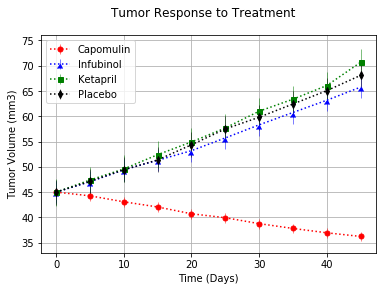

In [70]:
#Generate the Plot (with Error Bars)
plot_df=minor_pivot.reset_index()
plot_name = 'minor_plot'
plot_title='Tumor Response to Treatment'
plot_xlabel='Time (Days)'
plot_ylabel='Tumor Volume (mm3)'
plot_ylim=[33,76]
dics = []
plot_x = plot_df['Timepoint']
plot_columns = ['Capomulin','Infubinol','Ketapril','Placebo']
plot_colors = ['red', 'blue', 'green', 'black']
plot_markers= ['o',6,'s','d']
plot_error = [plot_df[plot_columns[i]].sem() for i in range(4)]
    
fig, plot_name = plt.subplots(figsize=(6,4))
fig.suptitle(plot_title, fontsize='12')
for i,drug in enumerate(plot_columns):
        plot_name.errorbar(plot_x, plot_df[drug], yerr=plot_error[i], 
                           fmt='.', color=plot_colors[i], marker=plot_markers[i], 
                           linestyle=':', ms='5', elinewidth=0.5)

plot_name.grid()
plot_name.set_xlabel(plot_xlabel)
plot_name.set_ylabel(plot_ylabel)
plot_name.set_ylim(plot_ylim)
plot_name.legend(loc='best')
    
plt.show()

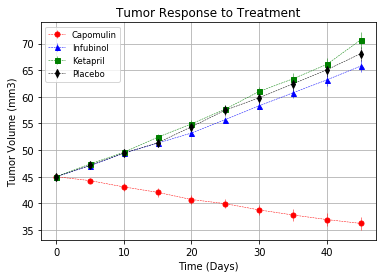

## Metastatic Response to Treatment

In [21]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_met = merge_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean().reset_index().set_index(['Drug','Timepoint'])
# Preview DataFrame
mean_met.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [22]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
stderror_met = merge_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem().reset_index().set_index(['Drug','Timepoint'])
# Preview DataFrame
stderror_met.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [23]:
# Minor Data Munging to Re-Format the Data Frames
minor2 = merge_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean().reset_index()
# Create Pivot
minor_pivot2 = minor2.pivot(columns='Drug',index='Timepoint',
                            values='Metastatic Sites')
# Preview that Reformatting worked
minor_pivot2.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


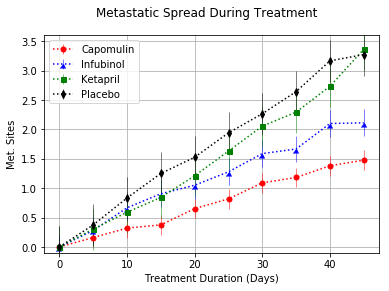

In [71]:
# Generate the Plot (with Error Bars)
plot_df=minor_pivot2.reset_index()
plot_name = 'minor_plot'
plot_title='Metastatic Spread During Treatment'
plot_xlabel='Treatment Duration (Days)'
plot_ylabel='Met. Sites'
plot_ylim=[-0.1,3.6]
dics = []
plot_x = plot_df['Timepoint']
plot_columns = ['Capomulin','Infubinol','Ketapril','Placebo']
plot_colors = ['red', 'blue', 'green', 'black']
plot_markers= ['o',6,'s','d']
plot_error = [plot_df[plot_columns[i]].sem() for i in range(4)]
    
fig, plot_name = plt.subplots(figsize=(6,4))
fig.suptitle(plot_title, fontsize='12')
for i,drug in enumerate(plot_columns):
        plot_name.errorbar(plot_x, plot_df[drug], yerr=plot_error[i], 
                           fmt='.', color=plot_colors[i], marker=plot_markers[i], 
                           linestyle=':', ms='5', elinewidth=0.5)

plot_name.grid()
plot_name.set_xlabel(plot_xlabel)
plot_name.set_ylabel(plot_ylabel)
plot_name.set_ylim(plot_ylim)
plot_name.legend(loc='best')
# Show the Figure   
plt.show()

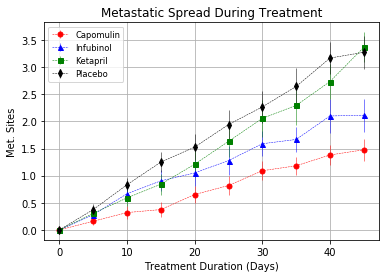

## Survival Rates

In [27]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
survival= merge_df.groupby(['Drug','Timepoint']).MouseID.count().reset_index()
survival.columns = ['Drug', 'Timepoint', 'Mouse Count']
# Preview DataFrame
survival.head(5)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [28]:
# Minor Data Munging to Re-Format the Data Frames
survival_pivot =survival.pivot(columns='Drug',index='Timepoint',
                       values='Mouse Count')
# Preview the Data Frame
survival_pivot.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

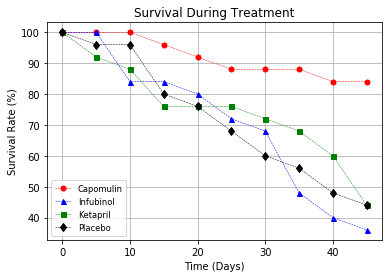

## Summary Bar Graph

In [31]:
#Calculate the percent changes for each drug
summary = minor_pivot.iloc[9] / minor_pivot.iloc[0] - 1

#Display the data to confirm
summary = pd.DataFrame(summary).reset_index()

print(summary)
#summary.columns = ['Drug','Percentage_change']
#relevant_percentage = (summary[(summary.Percentage_change < 0)])

        Drug         0
0  Capomulin -0.194753
1   Ceftamin  0.425165
2  Infubinol  0.461235
3   Ketapril  0.570288
4   Naftisol  0.539233
5    Placebo  0.512980
6   Propriva  0.472412
7   Ramicane -0.223209
8   Stelasyn  0.520851
9  Zoniferol  0.465798


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

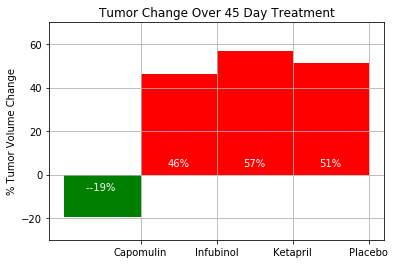